In [1]:
import json
import numpy as np
import trimesh
import open3d as o3d
from utils.data_load import load_image, load_3d_model, visualize_data # our own utils

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
# # % is provided by the IPython kernel and allows you to run "magic commands", many of which include well-known shell commands.
# # !, provided by Jupyter, allows shell commands to be run within cells.
# %pip install numpy

# Load dataset

In [3]:
dir = "data/pix3d"

In [4]:
with open(f"{dir}/pix3d.json", "rb") as f:
    metadata = json.load(f)

# Check as example 1 data point

In [5]:
# img, img_size, 2d_keypoints, mask, model, 3d_keypoints, voxel, rot_mat, trans_mat, focal_length, cam_position, inplane_rotation, bbox
metadata[0]

{'img': 'img/bed/0001.png',
 'category': 'bed',
 'img_size': [395, 244],
 '2d_keypoints': [[[182.5, 147.09375],
   [174.5, 225.09375],
   [16.5, 111.09375],
   [-1.0, -1.0],
   [-1.0, -1.0],
   [324.5, 101.09375],
   [336.5, 51.09375],
   [226.5, 20.09375],
   [-1.0, -1.0],
   [352.5, 121.09375]],
  [[181.5, 165.09375],
   [181.5, 224.09375],
   [3.5, 112.09375],
   [5.5, 141.09375],
   [-1.0, -1.0],
   [352.5, 90.09375],
   [349.5, 34.09375],
   [196.5, 26.09375],
   [-1.0, -1.0],
   [346.5, 114.09375]],
  [[171.5, 139.09375],
   [175.5, 227.09375],
   [29.5, 90.09375],
   [-1.0, -1.0],
   [-1.0, -1.0],
   [340.5, 80.09375],
   [351.5, 32.09375],
   [198.5, 22.09375],
   [-1.0, -1.0],
   [268.5, 79.09375]]],
 'mask': 'mask/bed/0001.png',
 'img_source': 'ikea',
 'model': 'model/bed/IKEA_MALM_2/model.obj',
 'model_raw': None,
 'model_source': 'ikea',
 '3d_keypoints': 'model/bed/IKEA_MALM_2/3d_keypoints.txt',
 'voxel': 'model/bed/IKEA_MALM_2/voxel.mat',
 'rot_mat': [[0.7813941591465821, 

In [6]:
img_path = dir+'/'+metadata[0]["img"]
mask_path = dir+'/'+metadata[0]["mask"]
model_path = dir+'/'+metadata[0]["model"]

In [7]:
img, mask = load_image(img_path, mask_path)
model_img = load_3d_model(model_path)

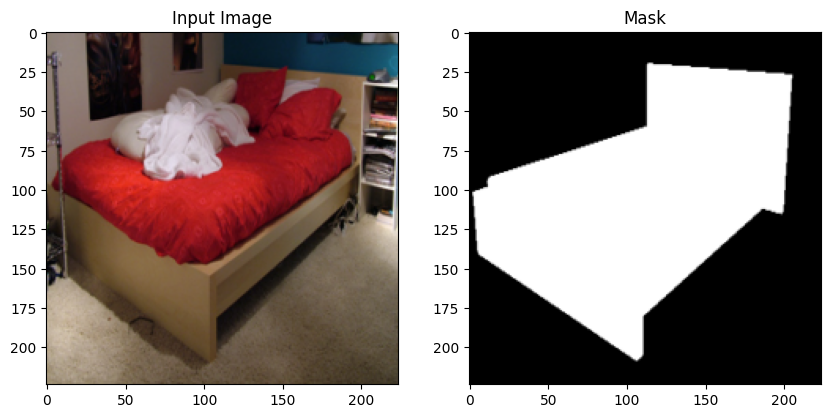

In [8]:
visualize_data(img, mask)

In [9]:
# visulize it as a mash
model_img.show()

In [10]:
if isinstance(model_img, trimesh.Scene):
    # combine all geometries, if this is a scene
    model_img = model_img.dump(concatenate=True)
else:
    model_img = model_img

point_cloud, _ = trimesh.sample.sample_surface(model_img, count=1024)  # Sample 1024 points

C:\Users\laxon\AppData\Local\Temp\ipykernel_17000\448560937.py:3: DeprecationWarning: `Scene.dump(concatenate=True)` DEPRECATED FOR REMOVAL APRIL 2025: replace with `Scene.to_geometry()`
  model_img = model_img.dump(concatenate=True)


In [11]:
# from trimesh create PointCloud and visualize it
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(point_cloud)

o3d.visualization.draw_geometries([pcd])

In [12]:
# example data as arrays for PointCloud
np.asarray(pcd.points)

array([[-0.26101562,  0.11636314,  0.36490805],
       [-0.2400936 ,  0.1008042 ,  0.36490805],
       [ 0.25543489, -0.05905426, -0.06641564],
       ...,
       [-0.20191992, -0.00359717,  0.28256885],
       [-0.2472771 , -0.03776942,  0.38497747],
       [-0.07693606, -0.11489412, -0.38497747]], shape=(1024, 3))

# Conslustions and approach
### *Better to use mash and predict vertices, after this use some algorithm to calculate faces*